In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam

In [14]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define model architecture
def create_model(input_shape, lr):
    model = Sequential([
        Input(shape=input_shape),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer=Adam(learning_rate=lr), 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])
    return model

# Hyperparameters combinations
hparams = [
    {'batch_size': 16, 'lr': 0.01},
    {'batch_size': 32, 'lr': 0.01},
    {'batch_size': 16, 'lr': 0.001},
]

# Train and store history for each combination
histories = []
models = []
input_shape = x_train.shape[1:]
epochs = 40

In [15]:
for params in hparams:
    print(f"starting to train model with hparams: {params}")
    model = create_model(input_shape, params['lr'])
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=epochs, 
                        batch_size=params['batch_size'], 
                        verbose=1)
    histories.append(history)
    models.append(model)

starting to train model with hparams: {'batch_size': 16, 'lr': 0.01}
Epoch 1/40
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2796 - accuracy: 0.9207 - val_loss: 0.2419 - val_accuracy: 0.9354
Epoch 2/40
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2113 - accuracy: 0.9448 - val_loss: 0.2038 - val_accuracy: 0.9468
Epoch 3/40
3750/3750 [==============================] - 28s 8ms/step - loss: 0.1978 - accuracy: 0.9500 - val_loss: 0.1981 - val_accuracy: 0.9538
Epoch 4/40
3750/3750 [==============================] - 29s 8ms/step - loss: 0.1765 - accuracy: 0.9572 - val_loss: 0.2824 - val_accuracy: 0.9431
Epoch 5/40
3750/3750 [==============================] - 23s 6ms/step - loss: 0.1727 - accuracy: 0.9593 - val_loss: 0.2437 - val_accuracy: 0.9506
Epoch 6/40
3750/3750 [==============================] - 21s 5ms/step - loss: 0.1599 - accuracy: 0.9616 - val_loss: 0.2975 - val_accuracy: 0.9442
Epoch 7/40
3750/3750 [==============================] - 19s 5

In [16]:
import pickle
with open("history.pickle", "wb") as f:
    (pickle.dump(histories, f))
with open("models.pickle", "wb") as f:
    (pickle.dump(models, f))

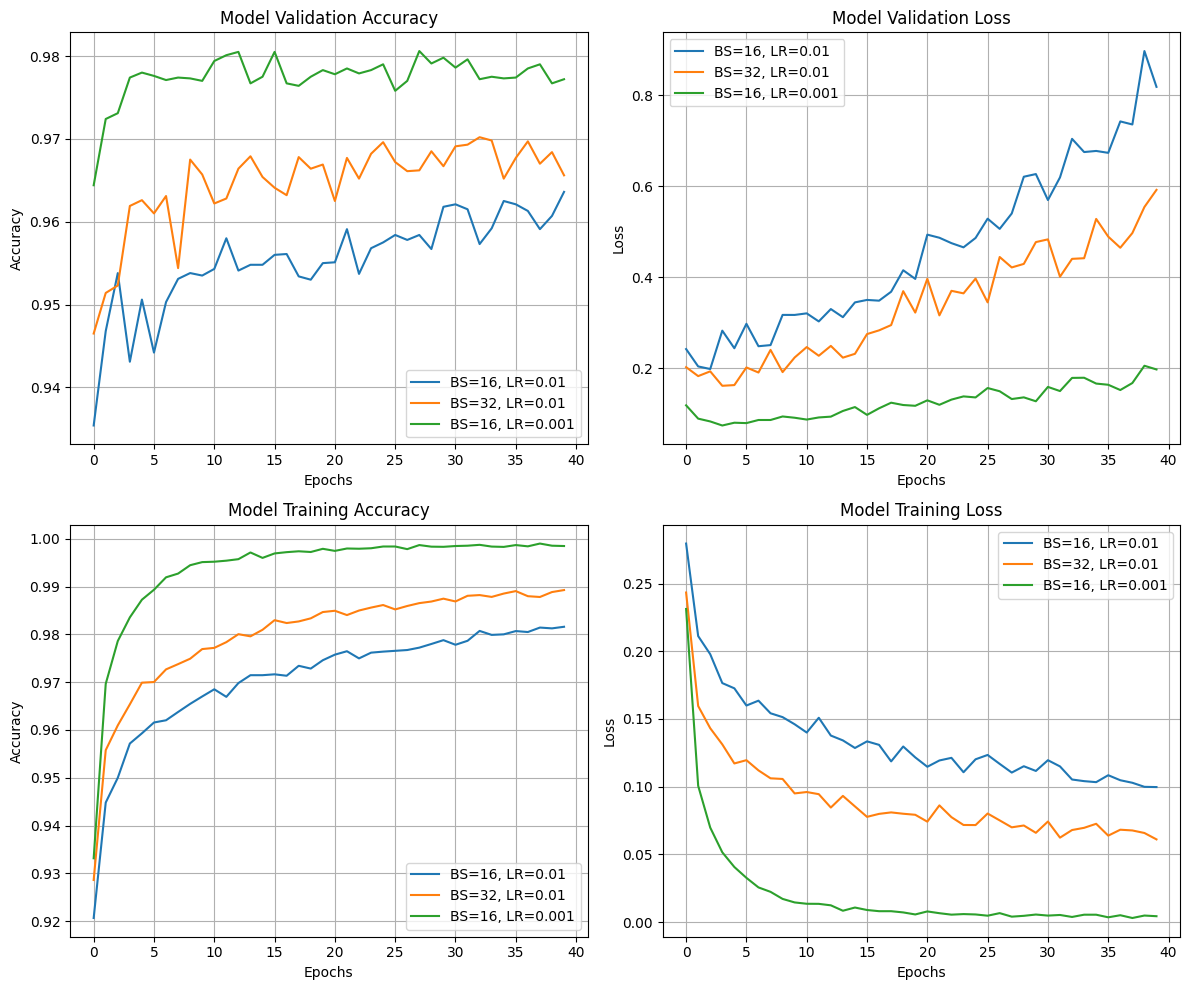

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot validation accuracy
for idx, params in enumerate(hparams):
    # Plot accuracy
    axes[0, 0].plot(histories[idx].history['val_accuracy'], label=f"BS={params['batch_size']}, LR={params['lr']}")
axes[0, 0].set_title('Model Validation Accuracy')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()

# Plot validation loss
for idx, params in enumerate(hparams):
    # Plot loss
    axes[0, 1].plot(histories[idx].history['val_loss'], label=f"BS={params['batch_size']}, LR={params['lr']}")
axes[0, 1].set_title('Model Validation Loss')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# Plot training accuracy
for idx, params in enumerate(hparams):
    axes[1, 0].plot(histories[idx].history['accuracy'], label=f"BS={params['batch_size']}, LR={params['lr']}")
axes[1, 0].set_title('Model Training Accuracy')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Plot training loss
for idx, params in enumerate(hparams):
    axes[1, 1].plot(histories[idx].history['loss'], label=f"BS={params['batch_size']}, LR={params['lr']}")
axes[1, 1].set_title('Model Training Loss')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

[axes[_, __].grid() for _ in range(2) for __ in range(2)]

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
#f1 score